## Scatterplots
If we want to inspect the **relationship between two numeric variables**, the standard choice of plot is the **scatterplot**. In a scatterplot, each data point is plotted individually as a point, its x-position corresponding to one feature value and its y-position corresponding to the second.

`matplotlib.pyplot.scatter()`

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# Read the CSV file
fuel_econ = pd.read_csv('fuel-econ.csv')
fuel_econ.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


### Scatter plot showing negative correlation between two variables

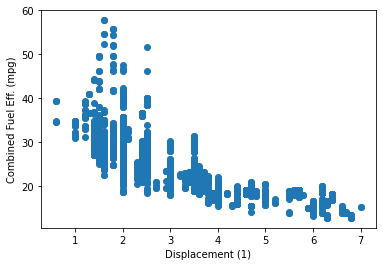

In [3]:
# Scatter plot
plt.scatter(data = fuel_econ, x = 'displ', y = 'comb');

plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)');

In the example above, the relationship between the two variables is negative because as higher values of the x-axis variable are increasing, the values of the variable plotted on the y-axis are decreasing.

### Alternative Approach - seaborn.regplot()
Seaborn's `sb.regplot()` function combines **scatterplot creation** with **regression function fitting**:

#### Scatter plot showing negative correlation between two variables

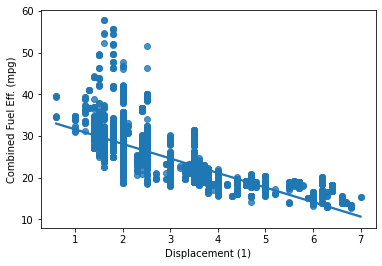

In [4]:
sb.regplot(data = fuel_econ, x = 'displ', y = 'comb');
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)');

#### Scatter plot showing a positive correlation between two variables

In the scatter plot above, by default, the regression function is linear and includes a shaded confidence region for the regression estimate. In this case, since the trend looks like a **\text{log}(y) \propto xlog(y)∝x relationship** (that is, *linear increases in the value of x are associated with linear increases in the log of y*), plotting the regression line on the raw units is not appropriate. If we **don't care about the regression line**, then we could set `fit_reg = False` in the regplot function call.

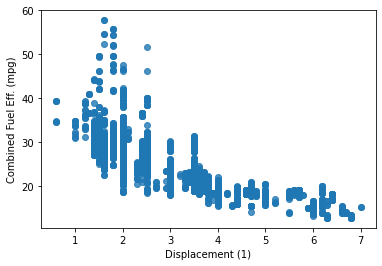

In [5]:
sb.regplot(data = fuel_econ, x = 'displ', y = 'comb', fit_reg = False);
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)');

### Plot the regression line on the transformed data
You can even plot the regression line on the transformed data as shown in the example below. For transformation, use a similar approach as you've learned in the last lesson.

/home/thura/Desktop/computer-vision-and-DL/torch-cv-env/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


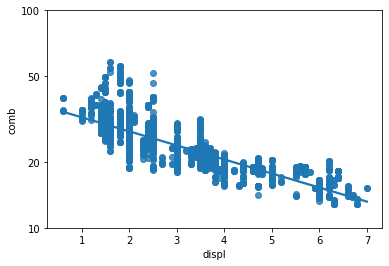

In [6]:
def log_trans(x, inverse = False):
    if not inverse:
        return np.log10(x)
    else:
        return np.power(10, x)

sb.regplot(fuel_econ['displ'], fuel_econ['comb'].apply(log_trans))
tick_locs = [10, 20, 50, 100]
plt.yticks(log_trans(tick_locs), tick_locs);

**Note** - In this example, the x- and y- values sent to `regplot` are set directly as 'Series', extracted from the 'dataframe'.